## 1. Finite Rectangular barrier:
$$
V(x) = 
\begin{cases}
0 & x<-a\\
V_0 & -a<x<a\\
0 & x>a
\end{cases}
$$
Transmission Coefficient $(\varepsilon = E/V_0)$:
$$
T^{-1}(\varepsilon) = 
\begin{cases}
1+\frac{1}{4\varepsilon(1-\varepsilon)}\sinh^2\left(\frac{2a}{\hbar}\sqrt{2mV_0(1-\varepsilon)}\right) & 0<\varepsilon<1\\
1+\frac{2m V_0 a^2}{\hbar^2} & \varepsilon = 1\\
1+\frac{1}{4\varepsilon(\varepsilon - 1)}\sin^2\left(\frac{2a}{\hbar}\sqrt{2mV_0(\varepsilon - 1)}\right) & \varepsilon>1
\end{cases}
$$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def TRectBarrier(V0,m,a,eps):
    if eps<1:
        Tinv = 1+(((np.sinh(2*a*np.sqrt(2*m*V0*(1-eps))/hbar))**2)/(4*eps*(1-eps)))
    elif eps == 1:
        Tinv = 1+2*m*V0*(a**2)/(hbar**2)
    else:
        Tinv = 1+(((np.sin(2*a*np.sqrt(2*m*V0*(eps - 1))/hbar))**2)/(4*eps*(eps - 1)))
    return 1/Tinv

hbar = 1.0546e-34    # in J*sec
e = 1.602e-19    # Charge of proton in Coulombs
me = 9.1094e-31    # mass of electron in kg
a0 = 1e-10    # 1 Angstrom = 10^(-10) meters
V0 = 1*e    # conversion from eV to Joules
n_points = 10000    # number of data points
epsilon = np.linspace(1e-10,5.0,n_points)


### (a) Variation of transmission coefficient with mass

Text(0.5, 1.0, 'Variation of Transmission Coefficient with mass(m)')

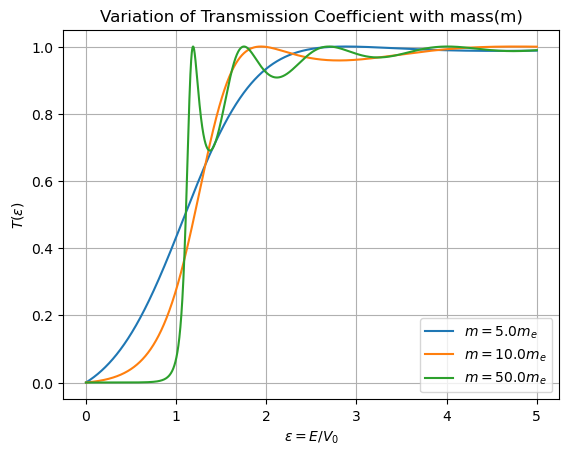

In [10]:
# Variation with mass
T = np.zeros(n_points)
multiples = np.array([5,10,50],float)
for mult in multiples:
    mass = me*mult
    for i in range(n_points):
        T[i] = TRectBarrier(V0,mass,a0,epsilon[i])
    plt.plot(epsilon,T,label = r'$m = '+str(mult)+'m_e$');

plt.legend();plt.grid();
plt.ylabel(r'$T(\varepsilon)$');plt.xlabel(r'$\varepsilon = E/V_0$')
plt.title('Variation of Transmission Coefficient with mass(m)')

### (b) Variation of transmission coefficient with barrier width a

Text(0.5, 1.0, 'Variation of Transmission Coefficient with barrier width(a)')

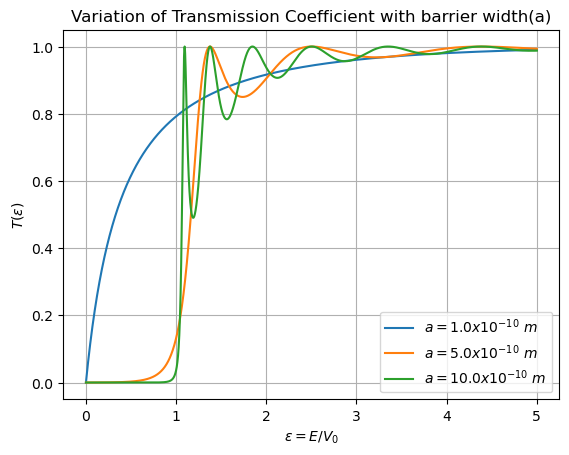

In [15]:
# Variation with barrier width
T = np.zeros(n_points)
multiples = np.array([1,5,10],float)
for mult in multiples:
    a = a0*mult
    for i in range(n_points):
        T[i] = TRectBarrier(V0,me,a,epsilon[i])
    plt.plot(epsilon,T,label = r'$a = '+str(mult)+'x 10^{-10}\ m$');

plt.legend();plt.grid();
plt.ylabel(r'$T(\varepsilon)$');plt.xlabel(r'$\varepsilon = E/V_0$')
plt.title('Variation of Transmission Coefficient with barrier width(a)')

Text(0.5, 1.0, 'Variation of Transmission Coefficient with potential strength $(V_0)$')

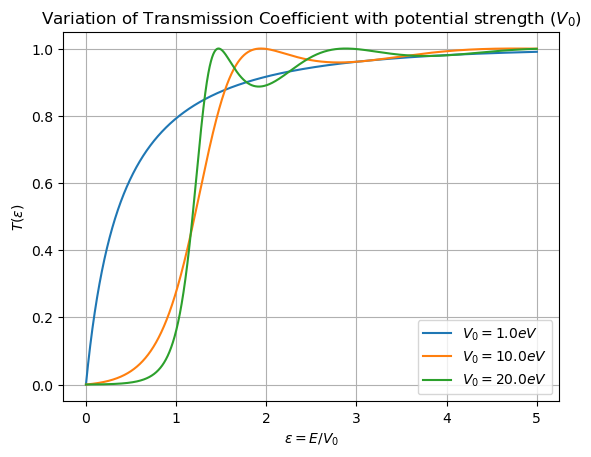

In [17]:
# Variation with potential strength
T = np.zeros(n_points)
multiples = np.array([1,10,20],float)
for mult in multiples:
    V = V0*mult
    for i in range(n_points):
        T[i] = TRectBarrier(V,me,a0,epsilon[i])
    plt.plot(epsilon,T,label = r'$V_0 = '+str(mult)+'eV$');

plt.legend();plt.grid();
plt.ylabel(r'$T(\varepsilon)$');plt.xlabel(r'$\varepsilon = E/V_0$')
plt.title(r'Variation of Transmission Coefficient with potential strength $(V_0)$')